In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [20]:
import sys
import os
import numpy as np
import scipy.sparse as sp
import json
import pandas as pd
from tqdm.autonotebook import tqdm, trange #if this throws error use "from tqdm import tqdm"
import matplotlib.pyplot as plt

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')

In [9]:
dataset = 'cifar10'
net = 'tnt'
bs = 64
n_epochs = 30
patch = 4
pixel = 2

NetName = {'tnt': 'Rand-TnT', 'tnt_timm': 'Pre-TnT'}
DataName = {'cifar10': 'CIFAR-10', 'stl10': 'STL-10', 'tiny-imagenet': 'Tiny-ImageNet-200'}

def set_default():
    global dataset, net, bs, n_epochs, patch, pixel
    dataset = 'cifar10'
    net = 'tnt'
    bs = 64
    n_epochs = 30
    patch = 4
    pixel = 2

In [24]:
!ls logs/cifar*

logs/cifar10_tnt_lr0.0001_bs64_nepochs30_patch4_pixel2.json
logs/cifar10_tnt_lr0.0002_bs256_nepochs5_patch4_pixel2.json
logs/cifar10_tnt_lr0.0003_bs64_nepochs30_patch4_pixel2.json
logs/cifar10_tnt_lr0.001_bs64_nepochs30_patch4_pixel2.json
logs/cifar10_tnt_lr1e-05_bs64_nepochs30_patch4_pixel2.json
logs/cifar10_tnt_timm_lr0.0001_bs64_nepochs5.json
logs/cifar10_tnt_timm_lr0.0003_bs64_nepochs5.json
logs/cifar10_tnt_timm_lr0.001_bs64_nepochs5.json
logs/cifar10_tnt_timm_lr1e-05_bs64_nepochs5.json
logs/cifar10_tnt_timm_lr3e-06_bs64_nepochs5.json


In [56]:
set_default()
dataset = 'stl10'; net = 'tnt_timm'; n_epochs = 5
Results = {}
for lr in [1e-3, 3e-4, 1e-4, 1e-5, 3e-6]:
    fname = f'logs/{dataset}_{net}_lr{lr}_bs{bs}_nepochs{n_epochs}'
    if net == 'tnt':
        fname += f'_patch{patch}_pixel{pixel}'
    fname += '.json'
    Results[lr] = pd.DataFrame(json.load(open(fname)))

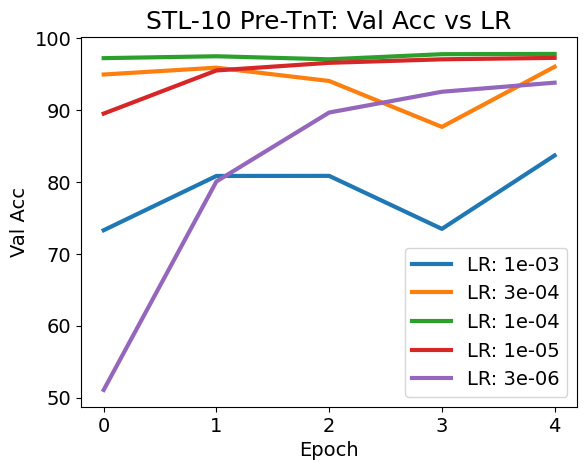

In [59]:
for lr, res in Results.items():
    plt.plot(res['val_acc'], linewidth=3)
plt.ylabel('Val Acc', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(range(5))
plt.yticks(fontsize=14)
plt.legend([f'LR: {"%.e"%lr}' for lr in list(Results.keys())], fontsize=14)
title = f'{DataName[dataset]} {NetName[net]}: Val Acc vs LR'
plt.title(title, fontsize=18);
plt.savefig(f'Plots/{"_".join(title.split())}', bbox_inches='tight')

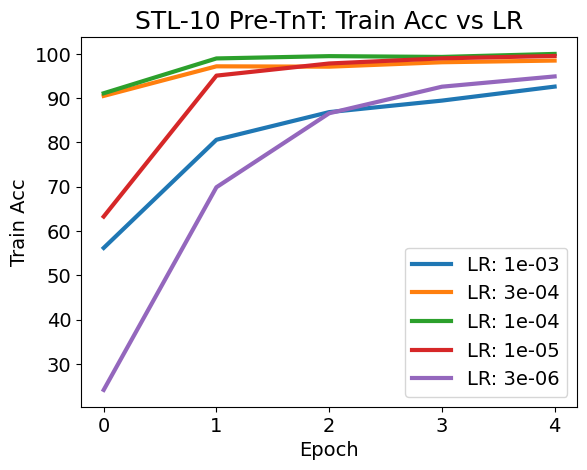

In [60]:
for lr, res in Results.items():
    plt.plot(res['trn_acc'], linewidth=3)
plt.ylabel('Train Acc', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(range(5))
plt.yticks(fontsize=14)
plt.legend([f'LR: {"%.e"%lr}' for lr in list(Results.keys())], fontsize=14)
title = f'{DataName[dataset]} {NetName[net]}: Train Acc vs LR'
plt.title(title, fontsize=18);
plt.savefig(f'Plots/{"_".join(title.split())}', bbox_inches='tight')